# **Week 3 Q1**
____
Implement the strassen’s multiplication method (using Divide and Conquer Strategy) and 
naive multiplication method. Compare these methods in terms of time taken using the nXn 
matrix where n=3, 4, 5, 6, 7 and 8 (compare in bar graph).
_____

### **STRASSEN'S MATRIX MULTIPLICATION vs NAIVE MATRIX MULTIPLICATION**

#### **Description**

**Naive Matrix Multiplication**
- Recureance relation is $$ T(n) = 8T (n/2) + n^2 $$
- Takes $O(n^3)$ time, where $n$ is the size of the matrix

**Strassen's Matrix Multiplication**
- Recureance relation is $$ T(n) = 7T (n/2) + n^2 $$
- Takes O(n ^ (2.81))

##### Importing all the modules redquired

In [119]:
from time import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

> #### **Strassen's Matrix Multiplication Method**
---

In [120]:

def strassen_algorithm(x, y):
    if x.size == 1 or y.size == 1:
        return x * y

    n = x.shape[0]

    if n % 2 == 1:
        x = np.pad(x, (0, 1), mode='constant')
        y = np.pad(y, (0, 1), mode='constant')

    m = int(np.ceil(n / 2))
    a = x[: m, : m]
    b = x[: m, m:]
    c = x[m:, : m]
    d = x[m:, m:]
    e = y[: m, : m]
    f = y[: m, m:]
    g = y[m:, : m]
    h = y[m:, m:]
    p1 = strassen_algorithm(a, f - h)
    p2 = strassen_algorithm(a + b, h)
    p3 = strassen_algorithm(c + d, e)
    p4 = strassen_algorithm(d, g - e)
    p5 = strassen_algorithm(a + d, e + h)
    p6 = strassen_algorithm(b - d, g + h)
    p7 = strassen_algorithm(a - c, e + f)
    result = np.zeros((2 * m, 2 * m), dtype=np.int32)
    result[: m, : m] = p5 + p4 - p2 + p6
    result[: m, m:] = p1 + p2
    result[m:, : m] = p3 + p4
    result[m:, m:] = p1 + p5 - p3 - p7

    return result[: n, : n]

> #### **Naive Matrix Multiplication Method**
---

In [121]:
def product_of_matrix(matrixA,matrixB):
    product_matrix=[]
    product_col=[]
    no_of_rowA=matrixA.shape[0]
    no_of_colA=matrixA.shape[1]
    no_of_rowB=matrixB.shape[0]
    no_of_colB=matrixB.shape[1]
    
    val=0
    for i in range(no_of_rowA):
        for j in range(no_of_colB):
            for k in range(no_of_colA):
                val=val+(matrixA[i][k]*matrixB[k][j])
            product_col.append(val)
            val=0
        product_matrix.append(product_col)
        product_col=[]
        
    return product_matrix

Creating Arrays for storing the time taken by each method for N x N matrices, where N ranges from 1 to 50 (inclusive)

In [122]:
strassen = []
naive = []

In [123]:
for i in range(1,51):
    arr1 = np.random.randint(1,1000,(i,i))
    arr2 = np.random.randint(1,1000,(i,i))
    tok = time()
    strassen_algorithm(arr1,arr2)
    tik = time()
    strassen.append((tik-tok))


In [124]:
for i in range(1,51):

    arr1 = np.random.randint(1,1000,(i,i))
    arr2 = np.random.randint(1,1000,(i,i))
    tok = time()
    for m in range(10):
        product_of_matrix(arr1,arr2)
    tik = time()
    naive.append((tik-tok)/10)

In [125]:
strassen = np.array(strassen)
naive = np.array(naive)

Creating A DataFrame using Pandas for Plotting

In [126]:
my_arr = np.array([strassen*1000,naive*1000]).transpose()
my_index = np.arange(1,51)
my_col = np.array(["Strassen","Naive"])

In [127]:
df = pd.DataFrame(my_arr,index=my_index,columns=my_col)
df.head()

,Strassen,Naive
1,0.000000,0.000000
2,0.000000,0.000000
3,1.935720,0.000000
4,0.000000,0.100875
5,2.002001,0.000000


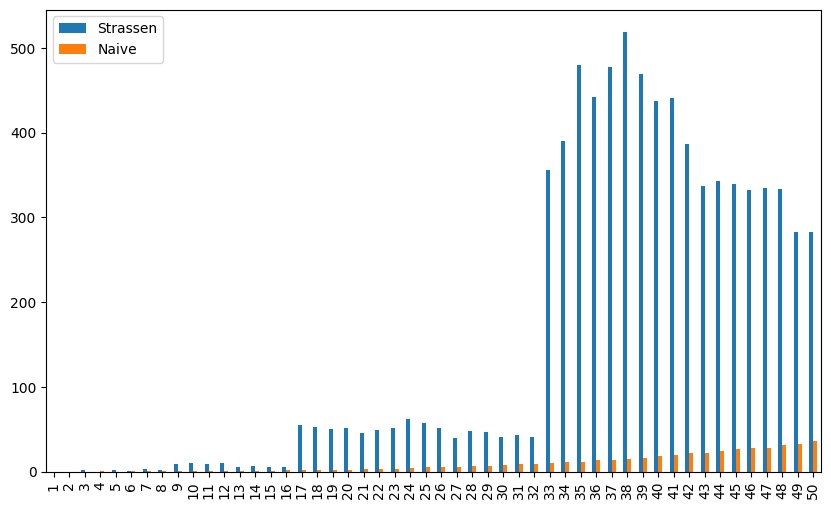

In [128]:
df.plot(kind = 'bar',figsize=(10,6))
plt.legend(loc='upper left')

- THE NAIVE METHOD TAKES LESSER TIME THAN STRASSEN'S METHOD AS THE MATRIX SIZE IS SMALL, BUT WE CAN FIGURE OUT THE TREND FROM GRAPH, THE STRASSEN'S METHOD WILL TAKE LESS TIME IF THE SIZE OF THE MATRIX IS MORE THAN 1000 x 1000

---